In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection

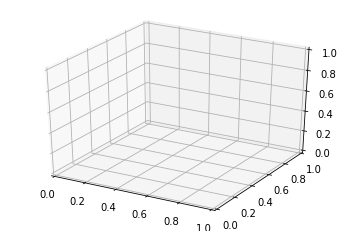

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')

In [13]:
ax.plot([1, 5], [5, 5], [3, 6], label='hi')

In [14]:
ax.legend()
plt.show()

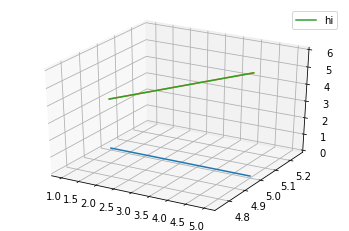

In [16]:
fig

In [1]:
import ipyvolume as ipv
import numpy as np
N = 1000
x, y, z = np.random.normal(0, 1, (3, N))

ModuleNotFoundError: No module named 'ipyvolume'

<IPython.core.display.Javascript object>


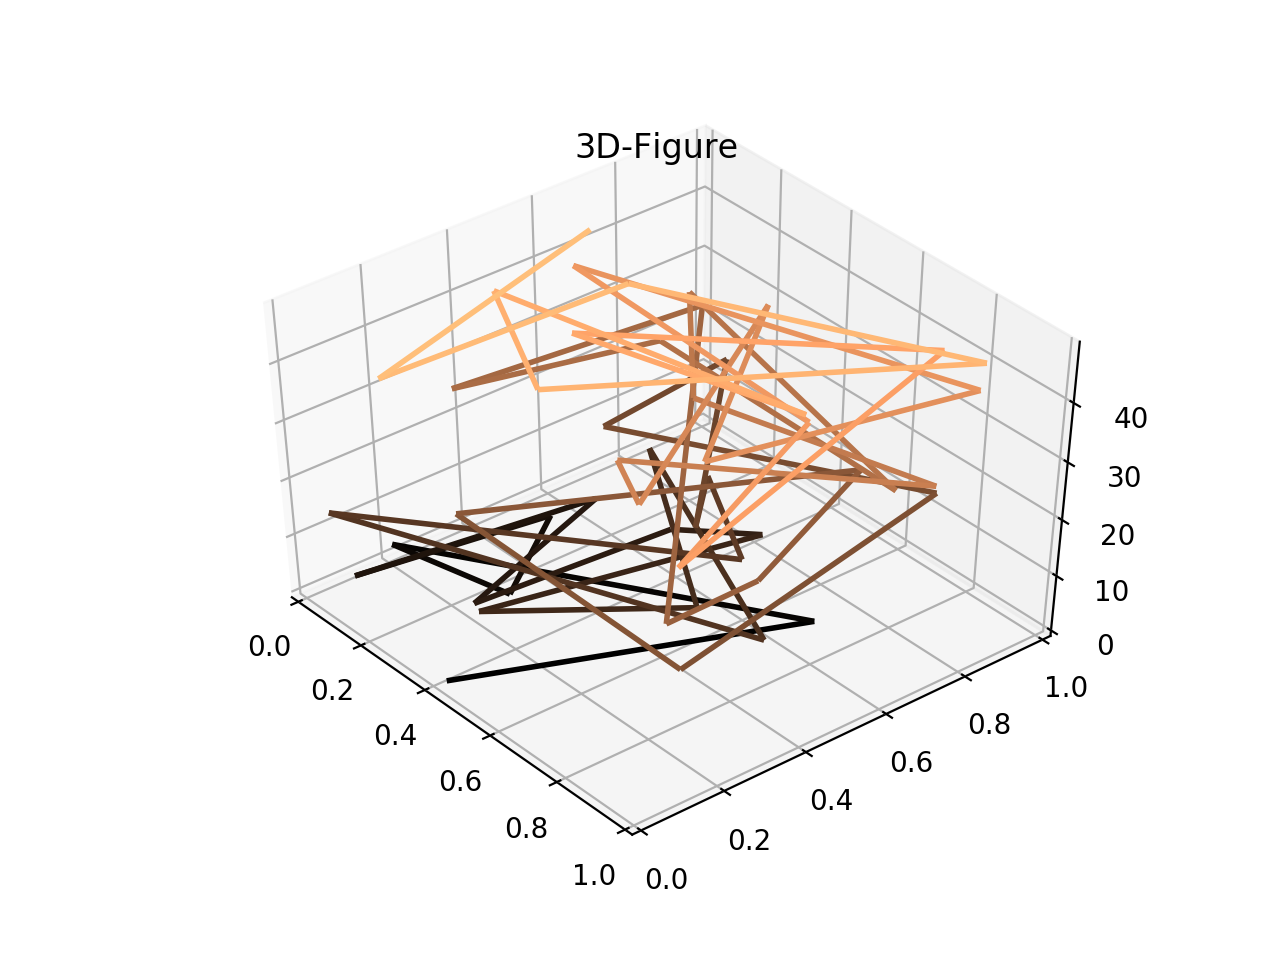

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm    
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
%matplotlib notebook

# Generate random data
np.random.seed(1)
n = 50 # number of data points
#set x,y,z data
x = np.random.uniform(0, 1, n)
y  = np.random.uniform(0, 1, n)
z = np.arange(0,n)

# Create a colormap for red, green and blue and a norm to color
# f' < -0.5 red, f' > 0.5 blue, and the rest green
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)

#################
### 3D Figure ###
#################

# Create a set of line segments
points = np.array([x, y, z]).T.reshape(-1, 1, 3)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the 3D-line collection object
lc = Line3DCollection(segments, cmap=plt.get_cmap('copper'),
                    norm=plt.Normalize(0, n))
lc.set_array(z) 
lc.set_linewidth(2)

#plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_zlim(0, max(z))
plt.title('3D-Figure')
ax.add_collection3d(lc, zs=z, zdir='z')

In [17]:
segments.shape

(49, 2, 3)

In [13]:
points[::-1].shape

(50, 1, 3)

In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

100%|██████████| 19/19 [00:00<00:00, 63.53it/s]


    Is region              ID1             ID2  New ID  Distance  Num original In region  In reg merge  Cell type num diff
0       False    M_RNA.IntA.B1   M_RNA.IntA.B2      15  0.302310             2    M_IntA         False                 NaN
1       False     M_RNA.Med.A1    M_RNA.Med.B1      16  0.434483             2     M_Med         False                 NaN
2       False     M_RNA.Lat.B1    M_RNA.Lat.B2      17  0.500286             2     M_Lat         False                 NaN
3       False    M_RNA.IntP.A1   M_RNA.IntP.A2      18  0.581145             2    M_IntP         False                 NaN
4       False    M_RNA.IntA.A1    M_RNA.Lat.A1      19  0.518902             2         6          True                 NaN
5       False               15              17      20  0.679523             4         6          True                 NaN
6        True           M_IntA           M_Lat       6  0.599212             6         6          True                 0.0
7       False   

<IPython.core.display.Javascript object>


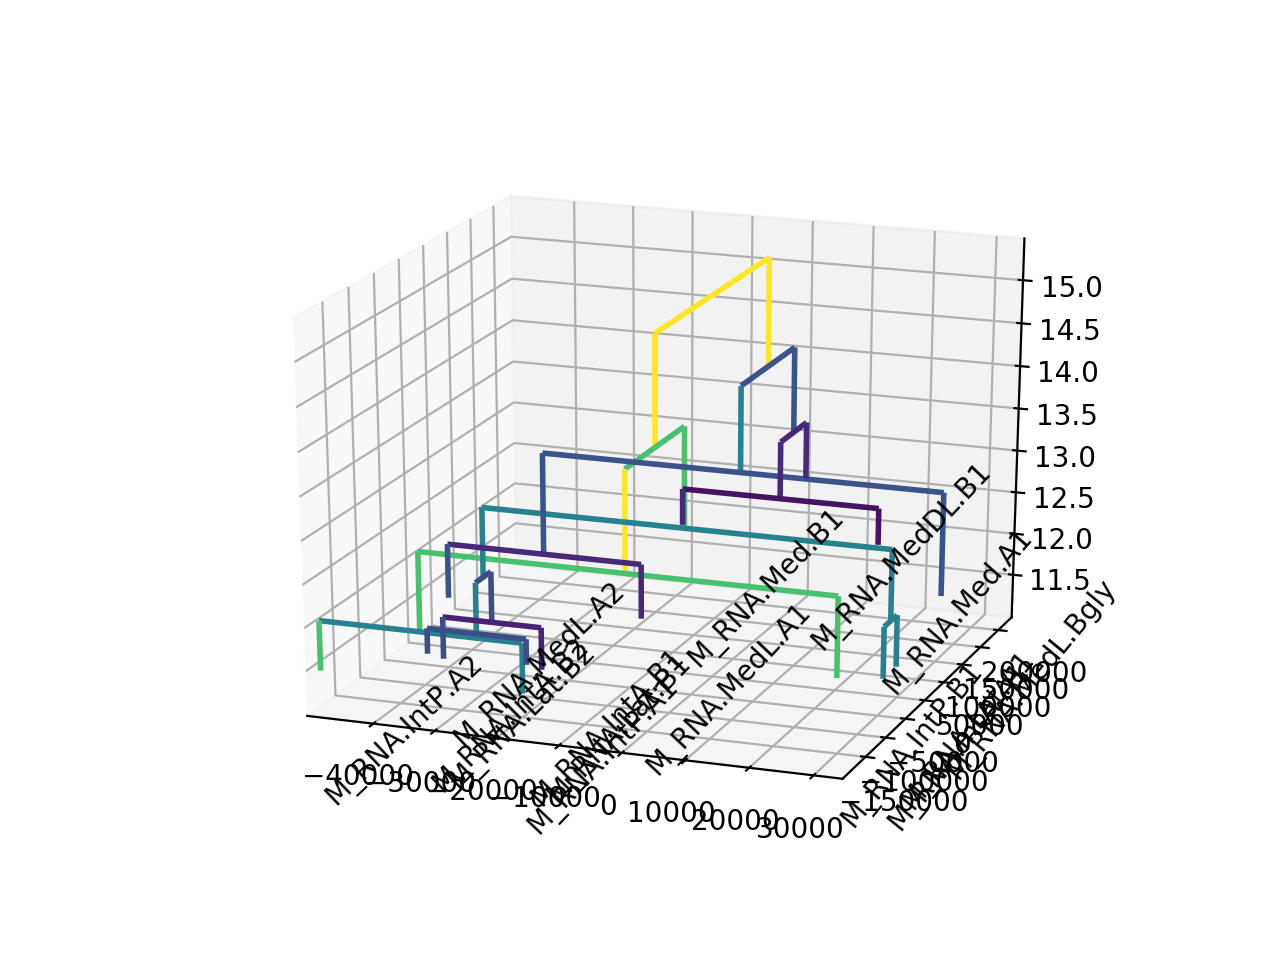

None
Total time elapsed: 3.3797695687s


In [2]:
from Agglomerate3D import Agglomerate3D
from data_utils import read_data
from scipy.stats import spearmanr
import pandas as pd
import time
%matplotlib notebook

if __name__ == '__main__':
    data = read_data(['mouse'], ['mouse'])

    def spearmanr_connectivity(x, y):
        # data is assumed to be (n_variables, n_examples)
        rho, _ = spearmanr(x, y, axis=1)
        return 1 - rho

    agglomerate = Agglomerate3D(
        cell_type_affinity=spearmanr_connectivity,
        linkage_cell='complete',
        linkage_region='homolog_avg',
        max_region_diff=0,
        region_dist_scale=1,
        verbose=False,
        pbar=True,
        integrity_check=True
    )

    start = time.process_time()
    agglomerate.agglomerate(data)
    end = time.perf_counter()
    pd.options.display.width = 0
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    print(agglomerate.linkage_mat_readable)
    print(agglomerate.view_tree3d())
    print(f'Total time elapsed: {(end - start) / 10}s')

<IPython.core.display.Javascript object>


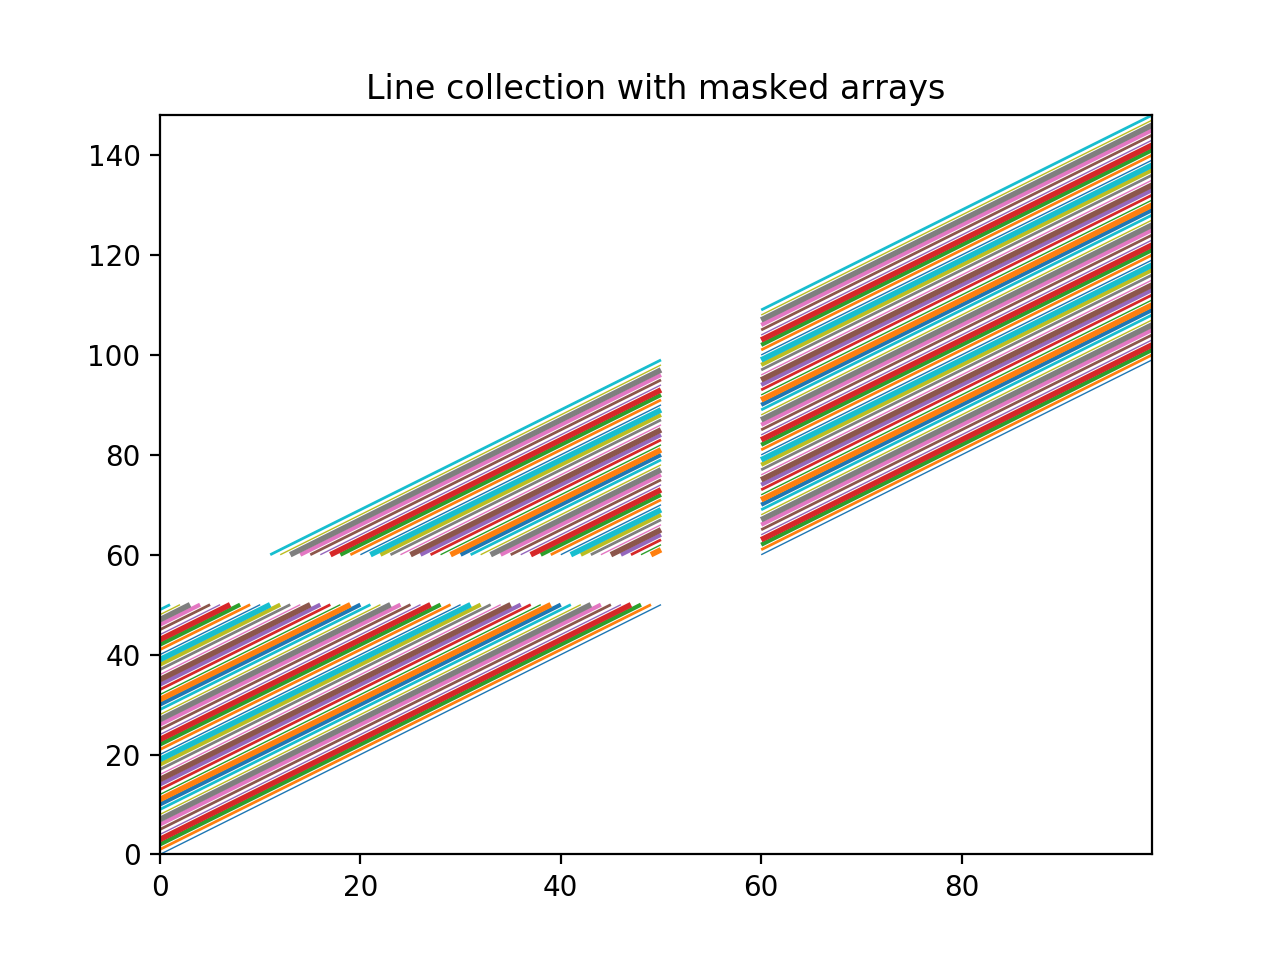

In [3]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

import numpy as np

# In order to efficiently plot many lines in a single set of axes,
# Matplotlib has the ability to add the lines all at once. Here is a
# simple example showing how it is done.

x = np.arange(100)
# Here are many sets of y to plot vs x
ys = x[:50, np.newaxis] + x[np.newaxis, :]

segs = np.zeros((50, 100, 2))
segs[:, :, 1] = ys
segs[:, :, 0] = x

# Mask some values to test masked array support:
segs = np.ma.masked_where((segs > 50) & (segs < 60), segs)

# We need to set the plot limits.
fig, ax = plt.subplots()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(ys.min(), ys.max())

# colors is sequence of rgba tuples
# linestyle is a string or dash tuple. Legal string values are
#          solid|dashed|dashdot|dotted.  The dash tuple is (offset, onoffseq)
#          where onoffseq is an even length tuple of on and off ink in points.
#          If linestyle is omitted, 'solid' is used
# See :class:`matplotlib.collections.LineCollection` for more information
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]

line_segments = LineCollection(segs, linewidths=(0.5, 1, 1.5, 2),
                               colors=colors, linestyle='solid')
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
plt.show()

In [5]:
segs.shape

(50, 100, 2)

In [8]:
len(colors)

10

In [11]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)]

In [15]:
from matplotlib import cm

In [27]:
cm.autumn([1,2,3, 50, 100, 200, 255])

array([[1.        , 0.00392157, 0.        , 1.        ],
       [1.        , 0.00784314, 0.        , 1.        ],
       [1.        , 0.01176471, 0.        , 1.        ],
       [1.        , 0.19607843, 0.        , 1.        ],
       [1.        , 0.39215686, 0.        , 1.        ],
       [1.        , 0.78431373, 0.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        ]])